In [114]:
import pandas as pd
import json
import os
import sys
import glob
import graph_tool.all as gt
from datetime import datetime, date, time
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
import numpy as np
import math
import seaborn as sns

statistics_dir = '/home/maniaa/ashes/code/statistics/'
stat_csv = [(statistics_dir + f) for f in listdir(statistics_dir) if (f.endswith(".csv") and isfile(join(statistics_dir, f)))]
stat_csv.sort()
stat_csv = stat_csv[1:]

In [117]:
def build_graph(data):
    gstr = data['workflow.dag']
    wrk_edges = [e.split('>') for e in gstr.split(',')]
    lbl_vid = {}
    graph = {'nodes': {}, 'edges': []}
    g = gt.Graph(directed=True)
    v_lbl = g.new_vertex_property("int")
    for e in wrk_edges:
        srclbl = int(e[0].split('-')[1])
        if srclbl not in lbl_vid:
            vsrc = g.add_vertex()
            v_lbl[vsrc] = srclbl
            lbl_vid[srclbl] = int(vsrc)
            
        if len(e) > 1:
            trgtlbl = int(e[1].split('-')[1])
            if trgtlbl not in lbl_vid:
                vtgt = g.add_vertex()
                v_lbl[vtgt] = trgtlbl
                lbl_vid[trgtlbl] = int(vtgt)
            g.add_edge(lbl_vid[srclbl], lbl_vid[trgtlbl])
   
    g.vertex_properties['label'] = v_lbl
    data['dag_nv'] = g.num_vertices()
    data['dag_ne'] = g.num_edges()
    return data

for index, f in enumerate(stat_csv):
    print(f) # 6Am of each day
    

    month, day, year = f.split('/')[-1].split('.csv')[0].split('-')
    trace_starttime = datetime.combine(date(int(year), int(month), int(day)), time(7, 0))
    
    df = pd.read_csv(f)
    df = df[df['submitTime']/1000 > datetime.timestamp(trace_starttime)]
    df = df[df['state'] == 'SUCCEEDED']
    df['submit_ts'] = df['submitTime']//1000 - datetime.timestamp(trace_starttime);
    df['submit_10min'] = df['submit_ts']//(10*60); 
    df.sort_values('submit_ts', inplace=True)
    df.reset_index(inplace=True)
    df = df.apply(build_graph, axis=1)
    
    if index == 0:
        break


/home/maniaa/ashes/code/statistics/08-02-2018.csv


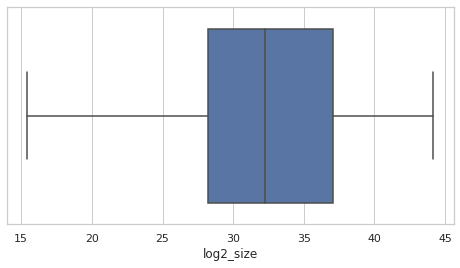

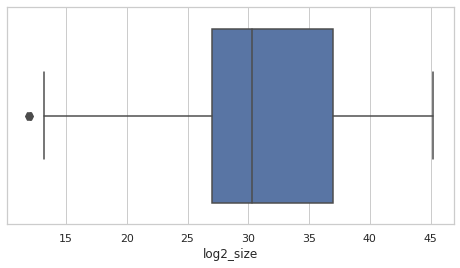

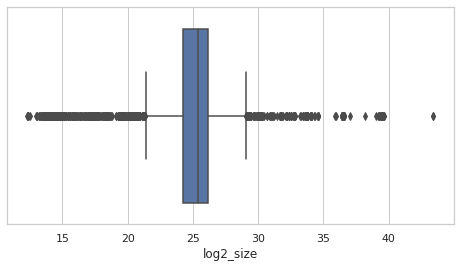

156 156


In [116]:
dt = pd.DataFrame();
dt2 = pd.DataFrame();
dt3 = pd.DataFrame();

sns.set(style="whitegrid")


dt2 = df[df['dag_nv'] > 5].groupby('workflow.id')['HDFS_INPUT_SIZE'].agg('sum').reset_index()
dt2['log2_size'] = np.log2(dt2['HDFS_INPUT_SIZE'])

dt = df[(df['dag_nv'] > 2) & (df['dag_nv'] <= 5) & (~df['query'].str.contains('hdfs_latest_calmonth'))].groupby('workflow.id')['HDFS_INPUT_SIZE'].agg('sum').reset_index()
dt['log2_size'] = np.log2(dt['HDFS_INPUT_SIZE'])

fig, ax = plt.subplots(figsize=(8,4))
sns.boxplot(x=dt["log2_size"], ax =ax)

fig, ax = plt.subplots(figsize=(8,4))
sns.boxplot(x=dt2["log2_size"], ax =ax)

fig, ax = plt.subplots(figsize=(8,4))
dt3['log2_size'] = np.log2(df[df['dag_nv'] == 1]['HDFS_INPUT_SIZE'])
sns.boxplot(x=dt3["log2_size"], ax =ax)

plt.show()


print(len(dt), len(dt))

In [104]:
pd.set_option("display.min_rows", 200)
pd.set_option("display.max_colwidth", 300)
df[(df['dag_nv'] > 2) & (df['dag_nv'] <= 5) & (df['user.name'].isin(['asupdl']))][['HDFS_INPUT_SIZE', 'query', 'HDFS_OUTPUT_SIZE', 'workflow.dag', 'workflow.node']].sort_values('HDFS_INPUT_SIZE', ascending=False)

,HDFS_INPUT_SIZE,query,HDFS_OUTPUT_SIZE,workflow.dag,workflow.node
11618,3021111965182,"\n\nINSERT INTO TABLE curr_views_db.cm_zerohour \nSELECT asup_key, object_name, instance_name, cur_time_stamp, counters from (\n SELECT cm.asup_key, object_name, instance_name, cur_time_stamp, counters,\n row_number() over (partition by cm.asup_key, object_name, instance_name order by...",132360155912,"Stage-2>Stage-0,Stage-0>Stage-3,Stage-1>Stage-2,Stage-7>Stage-1",Stage-2
11550,792290214556,"\n\nINSERT INTO TABLE curr_views_db.cm_zerohour \nSELECT asup_key, object_name, instance_name, cur_time_stamp, counters from (\n SELECT cm.asup_key, object_name, instance_name, cur_time_stamp, counters,\n row_number() over (partition by cm.asup_key, object_name, instance_name order by...",3020968048776,"Stage-2>Stage-0,Stage-0>Stage-3,Stage-1>Stage-2,Stage-7>Stage-1",Stage-1
5001,149498413072,SELECT COUNT(DISTINCT scs.serial_number) AS total_cmode FROM guestdb.system_customer_site AS scs LEFT JOIN default.system s ON (scs.serial_number=s.sys_serial_no) WHERE LOWER(scs.customer_name) NOT LIKE '%netapp%' AND LOWER(scs.customer_name) NOT LIKE '%network appliance%' AND DATEDIFF(from_unix...,4603666,"Stage-1>Stage-2,Stage-5>Stage-1",Stage-1
2395,69810862953,"\ncreate table a_adhoc_ava_report_data as\nselect b.*,a.asup_received_date from default.asup a, asuprep.altavault_megastore_stats b\nwhere a.asup_id=b.asup_id",31622915,"Stage-0>Stage-7,Stage-1>Stage-0,Stage-6>Stage-1,Stage-7>Stage-2",Stage-1
7213,9713863419,"insert into table guestdb.affse_temp_table_cm select asup_id, collect_set(concat(concat(concat(concat(concat(concat(concat(concat(concat(concat(concat(concat(concat(concat(concat(concat(concat(concat(concat(""{instance:"",instance_name),"",instance_uuid:""),""''""),"",wvblk_zombie_blks:""),split(counter...",223414,"Stage-2>Stage-0,Stage-0>Stage-3,Stage-1>Stage-2,Stage-7>Stage-1",Stage-1
4982,3745936730,SELECT COUNT(DISTINCT scs.serial_number) AS total_aff FROM guestdb.system_customer_site AS scs JOIN default.system s ON (scs.serial_number=s.sys_serial_no) WHERE LOWER(scs.customer_name) NOT LIKE '%netapp%' AND LOWER(scs.customer_name) NOT LIKE '%network appliance%' AND DATEDIFF(from_unixtime(u...,795488,"Stage-1>Stage-2,Stage-6>Stage-1",Stage-1
5027,3745893332,SELECT COUNT(DISTINCT scs.serial_number) AS total_contrls FROM guestdb.system_customer_site AS scs JOIN default.system s ON (scs.serial_number=s.sys_serial_no) WHERE LOWER(scs.customer_name) NOT LIKE '%netapp%' AND LOWER(scs.customer_name) NOT LIKE '%network appliance%' AND DATEDIFF(from_unixtim...,8039726,"Stage-1>Stage-2,Stage-6>Stage-1",Stage-1
5043,3745866923,SELECT COUNT(DISTINCT scs.customer_name) AS total_customers FROM guestdb.system_customer_site AS scs RIGHT JOIN default.system s ON (scs.serial_number=s.sys_serial_no) WHERE LOWER(scs.customer_name) NOT LIKE '%netapp%'AND LOWER(scs.customer_name) NOT LIKE '%network appliance%' AND DATEDIFF(from_...,7875611,"Stage-1>Stage-2,Stage-5>Stage-1",Stage-1
5036,8132913,SELECT COUNT(DISTINCT scs.serial_number) AS total_contrls FROM guestdb.system_customer_site AS scs JOIN default.system s ON (scs.serial_number=s.sys_serial_no) WHERE LOWER(scs.customer_name) NOT LIKE '%netapp%' AND LOWER(scs.customer_name) NOT LIKE '%network appliance%' AND DATEDIFF(from_unixtim...,7,"Stage-1>Stage-2,Stage-6>Stage-1",Stage-2
5055,7972410,SELECT COUNT(DISTINCT scs.customer_name) AS total_customers FROM guestdb.system_customer_site AS scs RIGHT JOIN default.system s ON (scs.serial_number=s.sys_serial_no) WHERE LOWER(scs.customer_name) NOT LIKE '%netapp%'AND LOWER(scs.customer_name) NOT LIKE '%network appliance%' AND DATEDIFF(from_...,6,"Stage-1>Stage-2,Stage-5>Stage-1",Stage-2


In [107]:
def _print(data):
    print(data['submit_10min'], data['query'], '\n\n')

df[df['query'].str.contains('hdfs_latest_calmonth')][['submit_10min', 'query', 'HDFS_INPUT_SIZE', 'workflow.dag', 'workflow.node', 'sessionid']].sort_values('submit_10min', ascending=True)

,submit_10min,query,HDFS_INPUT_SIZE,workflow.dag,sessionid
8,0.0,"\n\ninsert into UBS_SHELF_ASUPS_SD \nSELECT hc.* FROM default.hdfs_latest_calmonth hc,UBS_SHELF_ASUPS_1 b\nwhere hc.dt = '2197-02-11'\nand get_json_object(value, ""$.fields.asupId"")=b.asup_id",7210,"Stage-0>Stage-2,Stage-4>Stage-0,Stage-5>Stage-4",7c9922bc-d8be-470e-b972-d8bb9f306b31
42,0.0,"\n\ninsert into UBS_SHELF_ASUPS_SD \nSELECT hc.* FROM default.hdfs_latest_calmonth hc,UBS_SHELF_ASUPS_1 b\nwhere hc.dt = '2197-02-14'\nand get_json_object(value, ""$.fields.asupId"")=b.asup_id",7210,"Stage-0>Stage-2,Stage-4>Stage-0,Stage-5>Stage-4",9388a3be-6599-479c-9d13-67ee86c151aa
41,0.0,"\n\ninsert into UBS_SHELF_ASUPS_SD \nSELECT hc.* FROM default.hdfs_latest_calmonth hc,UBS_SHELF_ASUPS_1 b\nwhere hc.dt = '2045-11-02'\nand get_json_object(value, ""$.fields.asupId"")=b.asup_id",7210,"Stage-0>Stage-2,Stage-4>Stage-0,Stage-5>Stage-4",d19fe406-f50c-43b2-b97e-4e1ea16522f1
38,0.0,"\n\ninsert into UBS_SHELF_ASUPS_SD \nSELECT hc.* FROM default.hdfs_latest_calmonth hc,UBS_SHELF_ASUPS_1 b\nwhere hc.dt = '2087-07-12'\nand get_json_object(value, ""$.fields.asupId"")=b.asup_id",7210,"Stage-0>Stage-2,Stage-4>Stage-0,Stage-5>Stage-4",1b11abfb-3ee1-48c2-9079-341424b5d649
36,0.0,"\n\ninsert into UBS_SHELF_ASUPS_SD \nSELECT hc.* FROM default.hdfs_latest_calmonth hc,UBS_SHELF_ASUPS_1 b\nwhere hc.dt = '2134-09-26'\nand get_json_object(value, ""$.fields.asupId"")=b.asup_id",7210,"Stage-0>Stage-2,Stage-4>Stage-0,Stage-5>Stage-4",507f4398-633e-43c7-b059-9ddcc8169d7e
32,0.0,"\n\ninsert into UBS_SHELF_ASUPS_SD \nSELECT hc.* FROM default.hdfs_latest_calmonth hc,UBS_SHELF_ASUPS_1 b\nwhere hc.dt = '2197-02-13'\nand get_json_object(value, ""$.fields.asupId"")=b.asup_id",7210,"Stage-0>Stage-2,Stage-4>Stage-0,Stage-5>Stage-4",f12a22dc-a066-4402-83bb-da9d5e9425e1
29,0.0,"\n\ninsert into UBS_SHELF_ASUPS_SD \nSELECT hc.* FROM default.hdfs_latest_calmonth hc,UBS_SHELF_ASUPS_1 b\nwhere hc.dt = '2045-11-01'\nand get_json_object(value, ""$.fields.asupId"")=b.asup_id",7210,"Stage-0>Stage-2,Stage-4>Stage-0,Stage-5>Stage-4",25e4ea68-f94d-4242-be4e-9179dcbc77cb
27,0.0,"\n\ninsert into UBS_SHELF_ASUPS_SD \nSELECT hc.* FROM default.hdfs_latest_calmonth hc,UBS_SHELF_ASUPS_1 b\nwhere hc.dt = '2134-09-25'\nand get_json_object(value, ""$.fields.asupId"")=b.asup_id",7210,"Stage-0>Stage-2,Stage-4>Stage-0,Stage-5>Stage-4",7d3496bd-47f7-4e3a-930e-bd80ce5058ae
33,0.0,"\n\ninsert into UBS_SHELF_ASUPS_SD \nSELECT hc.* FROM default.hdfs_latest_calmonth hc,UBS_SHELF_ASUPS_1 b\nwhere hc.dt = '2300-12-14'\nand get_json_object(value, ""$.fields.asupId"")=b.asup_id",7210,"Stage-0>Stage-2,Stage-4>Stage-0,Stage-5>Stage-4",631730d9-fb82-4131-8dd0-374e504f2ff4
23,0.0,"\n\ninsert into UBS_SHELF_ASUPS_SD \nSELECT hc.* FROM default.hdfs_latest_calmonth hc,UBS_SHELF_ASUPS_1 b\nwhere hc.dt = '2300-12-13'\nand get_json_object(value, ""$.fields.asupId"")=b.asup_id",7210,"Stage-0>Stage-2,Stage-4>Stage-0,Stage-5>Stage-4",a6521cf8-0f3b-4d49-b423-db062092d6fe


In [103]:
df[df['query.id'] == 'asupdl_20180831235959_a7d56514-b772-4cb3-b6fc-fe9f0399d24f']

,index,state,submitTime,startTime,finishTime,queueTime,runTime,NumMaps,avgMapTime,avgReduceTime,...,job,n_inputs,inputdir,workflow.node,workflow.id,workflow.dag,submit_ts,submit_10min,dag_nv,dag_ne
8,3555,SUCCEEDED,1535785299226,1535785303079,1535785315110,3853,12031,1,4492,0,...,"insert into UBS_SHELF...s.asupId"")=b.asup_id(Stage-4)",1,hdfs://datalake-nnha/tmp/hive/asupdl/7c9922bc-d8be-470e-b972-d8bb9f306b31/hive_2018-08-31_23-59-03_607_6846255666664699292-1/-mr-10006/9db04a6c-d285-4ab6-9d18-b276f6d51e1f,Stage-4,hive_asupdl_20180831235959_a7d56514-b772-4cb3-b6fc-fe9f0399d24f,"Stage-0>Stage-2,Stage-4>Stage-0,Stage-5>Stage-4",99.0,0.0,4,3


In [113]:
df[df['user.name'].str.contains('asupdl')][['submit_10min', 'query']]

,submit_10min,query
8,0.0,"\n\ninsert into UBS_SHELF_ASUPS_SD \nSELECT hc.* FROM default.hdfs_latest_calmonth hc,UBS_SHELF_ASUPS_1 b\nwhere hc.dt = '2197-02-11'\nand get_json_object(value, ""$.fields.asupId"")=b.asup_id"
9,0.0,"\n\ninsert into UBS_SHELF_ASUPS_SD \nSELECT hc.* FROM default.hdfs_latest_calmonth hc,UBS_SHELF_ASUPS_1 b\nwhere hc.dt = '2045-10-30'\nand get_json_object(value, ""$.fields.asupId"")=b.asup_id"
10,0.0,"\n\ninsert into UBS_SHELF_ASUPS_SD \nSELECT hc.* FROM default.hdfs_latest_calmonth hc,UBS_SHELF_ASUPS_1 b\nwhere hc.dt = '2087-07-10'\nand get_json_object(value, ""$.fields.asupId"")=b.asup_id"
18,0.0,"\n\ninsert into UBS_SHELF_ASUPS_SD \nSELECT hc.* FROM default.hdfs_latest_calmonth hc,UBS_SHELF_ASUPS_1 b\nwhere hc.dt = '2134-09-24'\nand get_json_object(value, ""$.fields.asupId"")=b.asup_id"
20,0.0,"\n\ninsert into UBS_SHELF_ASUPS_SD \nSELECT hc.* FROM default.hdfs_latest_calmonth hc,UBS_SHELF_ASUPS_1 b\nwhere hc.dt = '2197-02-12'\nand get_json_object(value, ""$.fields.asupId"")=b.asup_id"
21,0.0,"\n\ninsert into UBS_SHELF_ASUPS_SD \nSELECT hc.* FROM default.hdfs_latest_calmonth hc,UBS_SHELF_ASUPS_1 b\nwhere hc.dt = '2045-10-31'\nand get_json_object(value, ""$.fields.asupId"")=b.asup_id"
25,0.0,"\n\ninsert into UBS_SHELF_ASUPS_SD \nSELECT hc.* FROM default.hdfs_latest_calmonth hc,UBS_SHELF_ASUPS_1 b\nwhere hc.dt = '2087-07-11'\nand get_json_object(value, ""$.fields.asupId"")=b.asup_id"
27,0.0,"\n\ninsert into UBS_SHELF_ASUPS_SD \nSELECT hc.* FROM default.hdfs_latest_calmonth hc,UBS_SHELF_ASUPS_1 b\nwhere hc.dt = '2134-09-25'\nand get_json_object(value, ""$.fields.asupId"")=b.asup_id"
29,0.0,"\n\ninsert into UBS_SHELF_ASUPS_SD \nSELECT hc.* FROM default.hdfs_latest_calmonth hc,UBS_SHELF_ASUPS_1 b\nwhere hc.dt = '2045-11-01'\nand get_json_object(value, ""$.fields.asupId"")=b.asup_id"
32,0.0,"\n\ninsert into UBS_SHELF_ASUPS_SD \nSELECT hc.* FROM default.hdfs_latest_calmonth hc,UBS_SHELF_ASUPS_1 b\nwhere hc.dt = '2197-02-13'\nand get_json_object(value, ""$.fields.asupId"")=b.asup_id"
